In [139]:
import numpy as np
import pandas as pd
import requests
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime

sns.set()

### Fetch Sample Data

In [140]:
acronym_1 = 'ETH'
acronym_2 = 'BTC'
limit = 360

data_1 = requests.get('https://min-api.cryptocompare.com/data/v2/histoday', params={
    'fsym': acronym_1, 'tsym': 'USD', 'limit': limit, 'api_key': os.getenv("CRYPTOCOMPARE_API_KEY")})
df_1 = pd.DataFrame(data_1.json()['Data']['Data'])

data_2 = requests.get('https://min-api.cryptocompare.com/data/v2/histoday', params={
    'fsym': acronym_2, 'tsym': 'USD', 'limit': limit, 'api_key': os.getenv("CRYPTOCOMPARE_API_KEY")})
df_2 = pd.DataFrame(data_2.json()['Data']['Data'])

In [141]:
df_1

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
0,1627257600,2430.27,2175.42,2194.34,755760.16,1.749133e+09,2228.67,direct,
1,1627344000,2319.63,2152.97,2228.67,503449.86,1.127165e+09,2301.98,direct,
2,1627430400,2346.53,2245.77,2301.98,384405.14,8.833722e+08,2301.12,direct,
3,1627516800,2398.97,2268.67,2301.12,288398.83,6.695457e+08,2383.24,direct,
4,1627603200,2471.75,2318.50,2383.24,417083.79,9.983089e+08,2463.61,direct,
...,...,...,...,...,...,...,...,...,...
356,1658016000,1385.31,1320.65,1356.31,453213.77,6.132734e+08,1337.97,direct,
357,1658102400,1593.79,1335.77,1337.97,1027888.25,1.515087e+09,1583.55,direct,
358,1658188800,1625.03,1493.29,1583.55,875023.54,1.354213e+09,1543.12,direct,
359,1658275200,1620.73,1487.09,1543.12,655879.23,1.024543e+09,1521.72,direct,


In [142]:
df_2

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
0,1627257600,40553.85,35270.24,35369.93,100269.43,3.840983e+09,37269.52,direct,
1,1627344000,39535.50,36422.45,37269.52,58179.65,2.197490e+09,39496.69,direct,
2,1627430400,40906.09,38809.89,39496.69,66747.14,2.662886e+09,40030.01,direct,
3,1627516800,40633.62,39281.83,40030.01,31540.85,1.257968e+09,40030.52,direct,
4,1627603200,42301.76,38346.18,40030.52,42436.67,1.698015e+09,42231.83,direct,
...,...,...,...,...,...,...,...,...,...
356,1658016000,21658.47,20752.85,21199.01,25674.37,5.446093e+08,20792.81,direct,
357,1658102400,22749.06,20760.73,20792.81,66744.81,1.466429e+09,22447.39,direct,
358,1658188800,23790.89,21588.20,22447.39,79216.86,1.796379e+09,23399.91,direct,
359,1658275200,24276.14,22923.14,23399.91,74279.35,1.752952e+09,23222.77,direct,


### Merge dataframes, convert timestamp to datetime, reorder columns

In [143]:
df_1_copy = df_1.copy()
df_2_copy = df_2.copy()

df_1_copy['crypto'] = acronym_1
df_2_copy['crypto'] = acronym_2

df_join = pd.concat([df_1_copy, df_2_copy], axis=0, ignore_index=True)
df_join['time'] = df_join['time'].apply(lambda x: datetime.fromtimestamp(x))
df_join = df_join[['crypto', 'time', 'open', 'high', 'low', 'close', 'volumefrom', 'volumeto']]
df_join

,crypto,time,open,high,low,close,volumefrom,volumeto
0,ETH,2021-07-26,2194.34,2430.27,2175.42,2228.67,755760.16,1.749133e+09
1,ETH,2021-07-27,2228.67,2319.63,2152.97,2301.98,503449.86,1.127165e+09
2,ETH,2021-07-28,2301.98,2346.53,2245.77,2301.12,384405.14,8.833722e+08
3,ETH,2021-07-29,2301.12,2398.97,2268.67,2383.24,288398.83,6.695457e+08
4,ETH,2021-07-30,2383.24,2471.75,2318.50,2463.61,417083.79,9.983089e+08
...,...,...,...,...,...,...,...,...
717,BTC,2022-07-17,21199.01,21658.47,20752.85,20792.81,25674.37,5.446093e+08
718,BTC,2022-07-18,20792.81,22749.06,20760.73,22447.39,66744.81,1.466429e+09
719,BTC,2022-07-19,22447.39,23790.89,21588.20,23399.91,79216.86,1.796379e+09
720,BTC,2022-07-20,23399.91,24276.14,22923.14,23222.77,74279.35,1.752952e+09


### Linechart comparing the crypto currencies 

#### Prepare data for linechart

In [144]:
df_chart_1 = df_join.loc[df_join['crypto'] == acronym_1]
df_chart_2 = df_join.loc[df_join['crypto'] == acronym_2]
#df_chart_1.reset_index(drop=True, inplace=True)
#df_chart_2.reset_index(drop=True, inplace=True)

#df_chart_1
df_chart_2

,crypto,time,open,high,low,close,volumefrom,volumeto
361,BTC,2021-07-26,35369.93,40553.85,35270.24,37269.52,100269.43,3.840983e+09
362,BTC,2021-07-27,37269.52,39535.50,36422.45,39496.69,58179.65,2.197490e+09
363,BTC,2021-07-28,39496.69,40906.09,38809.89,40030.01,66747.14,2.662886e+09
364,BTC,2021-07-29,40030.01,40633.62,39281.83,40030.52,31540.85,1.257968e+09
365,BTC,2021-07-30,40030.52,42301.76,38346.18,42231.83,42436.67,1.698015e+09
...,...,...,...,...,...,...,...,...
717,BTC,2022-07-17,21199.01,21658.47,20752.85,20792.81,25674.37,5.446093e+08
718,BTC,2022-07-18,20792.81,22749.06,20760.73,22447.39,66744.81,1.466429e+09
719,BTC,2022-07-19,22447.39,23790.89,21588.20,23399.91,79216.86,1.796379e+09
720,BTC,2022-07-20,23399.91,24276.14,22923.14,23222.77,74279.35,1.752952e+09


#### Create chart df

In [145]:
df_chart_1 = df_join.loc[df_join['crypto'] == acronym_1]
df_chart_2 = df_join.loc[df_join['crypto'] == acronym_2]
df_chart_1.reset_index(drop=True, inplace=True)
df_chart_2.reset_index(drop=True, inplace=True)

df_chart = pd.DataFrame({'date': df_chart_1['time'], acronym_1: df_chart_1['open'], acronym_2: df_chart_2['open']})
df_chart

,date,ETH,BTC
0,2021-07-26,2194.34,35369.93
1,2021-07-27,2228.67,37269.52
2,2021-07-28,2301.98,39496.69
3,2021-07-29,2301.12,40030.01
4,2021-07-30,2383.24,40030.52
...,...,...,...
356,2022-07-17,1356.31,21199.01
357,2022-07-18,1337.97,20792.81
358,2022-07-19,1583.55,22447.39
359,2022-07-20,1543.12,23399.91


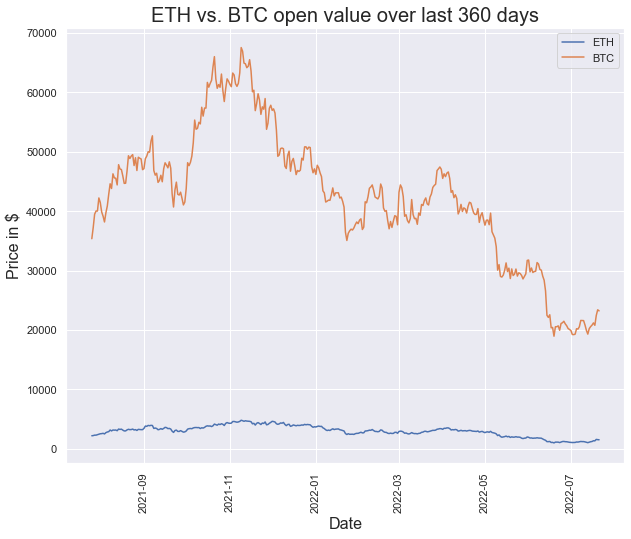

In [148]:
p = sns.lineplot()
p.plot(df_chart['date'], df_chart[acronym_1])
p.plot(df_chart['date'], df_chart[acronym_2])
p.tick_params(axis='x', rotation=90)
p.title.set_text('{acronym_1} vs. {acronym_2} open value over last {limit} days'.format(acronym_1=acronym_1, acronym_2 = acronym_2, limit = limit))
p.title.set_fontsize(20)
p.set_xlabel('Date', fontsize=16)
p.set_ylabel('Price in $', fontsize=16)
plt.legend([acronym_1, acronym_2])
sns.set(rc={'figure.figsize':(10,8)})
plt.show()